
# Import Data


In [48]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sn
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline


# Loading data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
switzerlandData = pd.read_csv('switzerland.csv', names = features)

# Load the Cleveland heart disease datasets
try:
    clevelandData = pd.read_csv('cleveland.csv', names = features)
    print("Cleveland Heart Disease UCI {} samples with {} features each.".format(*clevelandData.shape))
except:
    print("Cleveland Dataset could not be loaded. Is the dataset missing?")
    
    
# Load the Hungarian heart disease datasets
try:
    hungarianData = pd.read_csv('hungary.csv', names = features)
    print("Hungarian Heart Disease UCI {} samples with {} features each.".format(*hungarianData.shape))
except:
    print("Hungarian Dataset could not be loaded. Is the dataset missing?")
    
# Load the Swiss heart disease datasets
try:
    swissData = pd.read_csv('switzerland.csv', names = features)
    print("Swiss Heart Disease UCI {} samples with {} features each.".format(*swissData.shape))
except:
    print("Swiss Dataset could not be loaded. Is the dataset missing?")


Cleveland Heart Disease UCI 303 samples with 14 features each.
Hungarian Heart Disease UCI 294 samples with 14 features each.
Swiss Heart Disease UCI 123 samples with 14 features each.


In [49]:
# Combine datasets into one large dataset

datatemp = [clevelandData, hungarianData, swissData]
data = pd.concat(datatemp)
print("Combined Heart Disease UCI {} samples with {} features each.".format(*data.shape))

data.head()


Combined Heart Disease UCI 720 samples with 14 features each.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Edit<br />
age in years<br />
sex(1 = male; 0 = female)<br />
cp chest pain type<br />
trestbps resting blood pressure (in mm Hg on admission to the hospital)<br />
chol serum cholestoral in mg/dl<br />
fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br />
restecg resting electrocardiographic results<br />
thalach maximum heart rate achieved<br />
exang exercise induced angina (1 = yes; 0 = no)<br />
oldpeak ST depression induced by exercise relative to rest<br />
slope the slope of the peak exercise ST segment<br />
ca number of major vessels (0-3) colored by flourosopy<br />
thal 3 = normal; 6 = fixed defect; 7 = reversable defect<br />
heartdisease 1 - 4, 0 indicates no heart disease<br />

In [50]:
# Remove features from the larger dataset which contains a lot of missing data

data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)
print("After removing features with lots of missing data: Combined Heart Disease UCI {} samples with {} features each.".format(*data.shape))

data.head()

After removing features with lots of missing data: Combined Heart Disease UCI 720 samples with 11 features each.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0


# Data Exploration

In [51]:
# Display a description of the dataset
display(data.describe())

,age,sex,cp,heartdisease
count,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,0.850000
std,9.193720,0.439546,0.953646,1.076878
min,28.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,4.000000,0.500000
75%,58.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,4.000000


# Implementation:  Feature Relevance

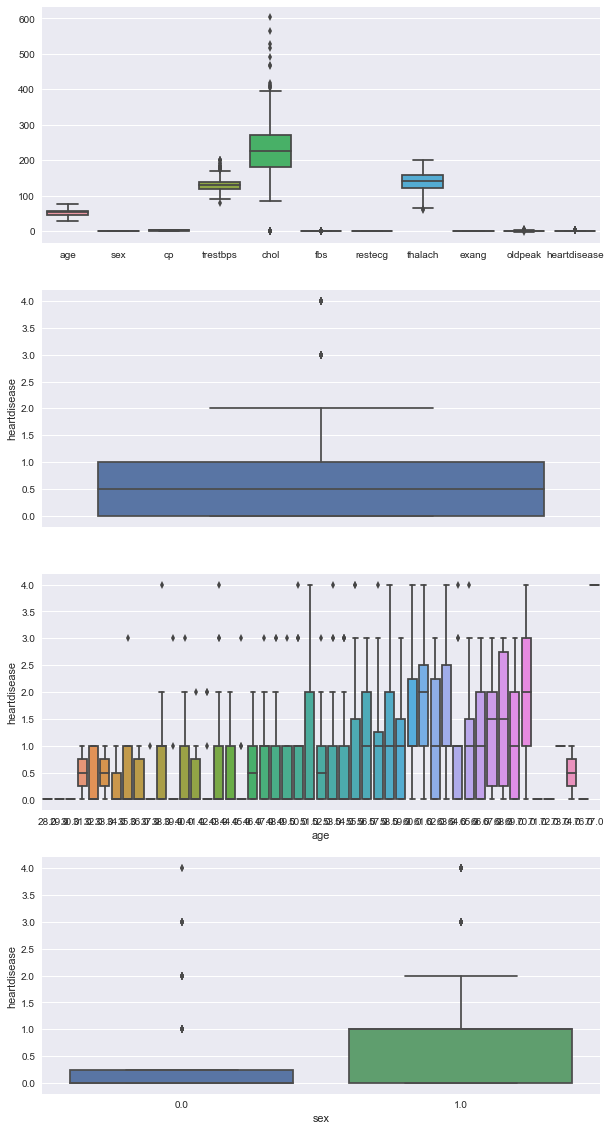

In [52]:
# Outliners detection and class imbalance
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

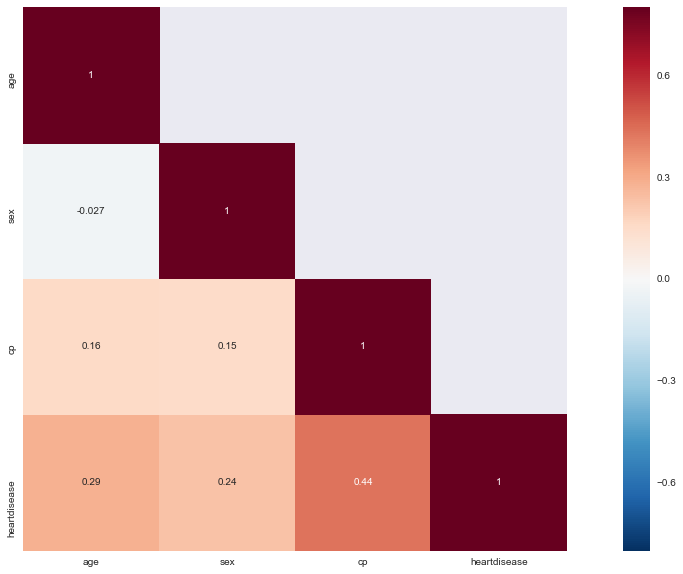

In [71]:
# Correlation analysis
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# Benchmark Model

In [73]:
# This base model attempts to predict the heartdisease value
# This code is copied from https://github.com/PacktPublishing/Real-World-Machine-Learning-Projects-with-Scikit-Learn

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


# Preprocessing the data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)

# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

# Accuracy of predictions
accuracy_score(y_test, preds)


0.65277777777777779

The accuracy score using SVM is 0.62.  This is the score I will attempt to improve using a different machine learning algorithm.

# Deep Learning

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

ModuleNotFoundError: No module named 'keras'